# Importing Modules

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset

In [53]:
ap_data = pd.read_csv('ap.csv')
od_data = pd.read_csv('od.csv')

In [54]:
ap_data.head()

,State,AC No.,AC Name,Winner Name,Party
0,Andhra Pradesh,Telugu Desam - TDP,135,0,135
1,Andhra Pradesh,Janasena Party - JnP,21,0,21
2,Andhra Pradesh,Yuvajana Sramika Rythu Congress Party - YSRCP,11,0,11
3,Andhra Pradesh,Bharatiya Janata Party - BJP,8,0,8


In [55]:
ap_data.rename(columns={'AC No.': 'Party Name', 'AC Name': 'Won', 'Party': 'Total'}, inplace=True)
od_data.rename(columns={'AC No.': 'Party Name', 'AC Name': 'Won', 'Party': 'Total'}, inplace=True)

In [56]:
if 'index' in ap_data.columns:
    ap_data.drop('index', axis=1, inplace=True)
if 'index' in od_data.columns:
    od_data.drop('index', axis=1, inplace=True)


In [57]:
ap_data.head()

,State,Party Name,Won,Winner Name,Total
0,Andhra Pradesh,Telugu Desam - TDP,135,0,135
1,Andhra Pradesh,Janasena Party - JnP,21,0,21
2,Andhra Pradesh,Yuvajana Sramika Rythu Congress Party - YSRCP,11,0,11
3,Andhra Pradesh,Bharatiya Janata Party - BJP,8,0,8


In [58]:
od_data.head()

,State,Party Name,Won,Winner Name,Total
0,Odisha,Bharatiya Janata Party - BJP,78,0,78
1,Odisha,Biju Janata Dal - BJD,51,0,51
2,Odisha,Indian National Congress - INC,14,0,14
3,Odisha,Communist Party of India (Marxist) - CPI(M),1,0,1
4,Odisha,Independent - IND,3,0,3


In [59]:
ap_winners = ap_data.groupby(['State', 'Total'])['Won'].sum().reset_index()
od_winners = od_data.groupby(['State', 'Total'])['Won'].sum().reset_index()


In [69]:
total_seats_ap = ap_data['Won'].sum()
print(f"Total seats in Andhra Pradesh: {total_seats_ap}")


Total seats in Andhra Pradesh: 175


In [70]:
total_seats_od = od_data['Won'].sum()
print(f"Total seats in Odisha: {total_seats_od}")


Total seats in Odisha: 147


In [80]:
common_parties = set(ap_data['Party Name']).intersection(set(od_data['Party Name']))

print("Common parties in AP and OD:")
for party in common_parties:
    print("-", party)


Common parties in AP and OD:
- Bharatiya Janata Party - BJP


# <b> Distribution of Winners By Party in Odisha

In [66]:
od_party_counts = od_data.groupby('Party Name')['Won'].sum()
print(od_party_counts)

Party Name
Bharatiya Janata Party - BJP                    78
Biju Janata Dal - BJD                           51
Communist Party of India  (Marxist) - CPI(M)     1
Independent - IND                                3
Indian National Congress - INC                  14
Name: Won, dtype: int64


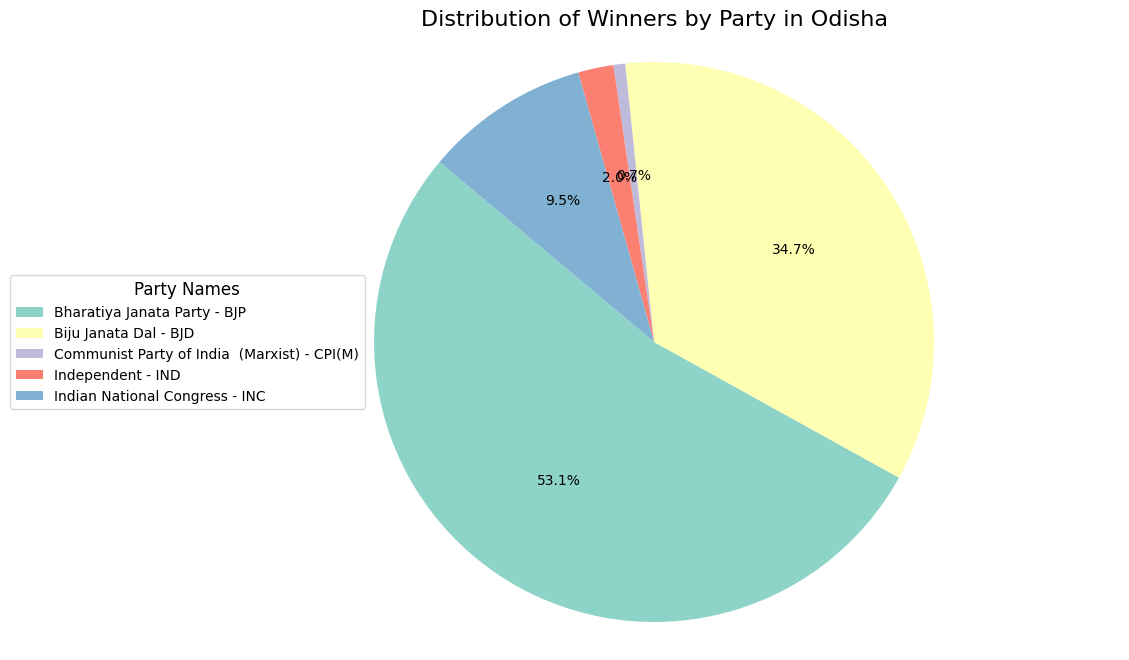

In [71]:
colors = plt.cm.Set3.colors

fig, ax = plt.subplots(figsize=(12, 8))  
wedges, texts, autotexts = ax.pie(od_party_counts, autopct='%1.1f%%',
                                  startangle=140, colors=colors)

ax.axis('equal')

legend = ax.legend(wedges, od_party_counts.index, title="Party Names", loc="center left", bbox_to_anchor=(-0.2, 0.5))
plt.setp(legend.get_title(), fontsize='large') 

ax.set_title('Distribution of Winners by Party in Odisha', fontsize=16)

plt.show()

# <b> Distribution of Winners by Party in Andhra Pradesh

In [72]:
ap_party_counts = ap_data.groupby('Party Name')['Won'].sum()
print(ap_party_counts)

Party Name
Bharatiya Janata Party - BJP                       8
Janasena Party - JnP                              21
Telugu Desam - TDP                               135
Yuvajana Sramika Rythu Congress Party - YSRCP     11
Name: Won, dtype: int64


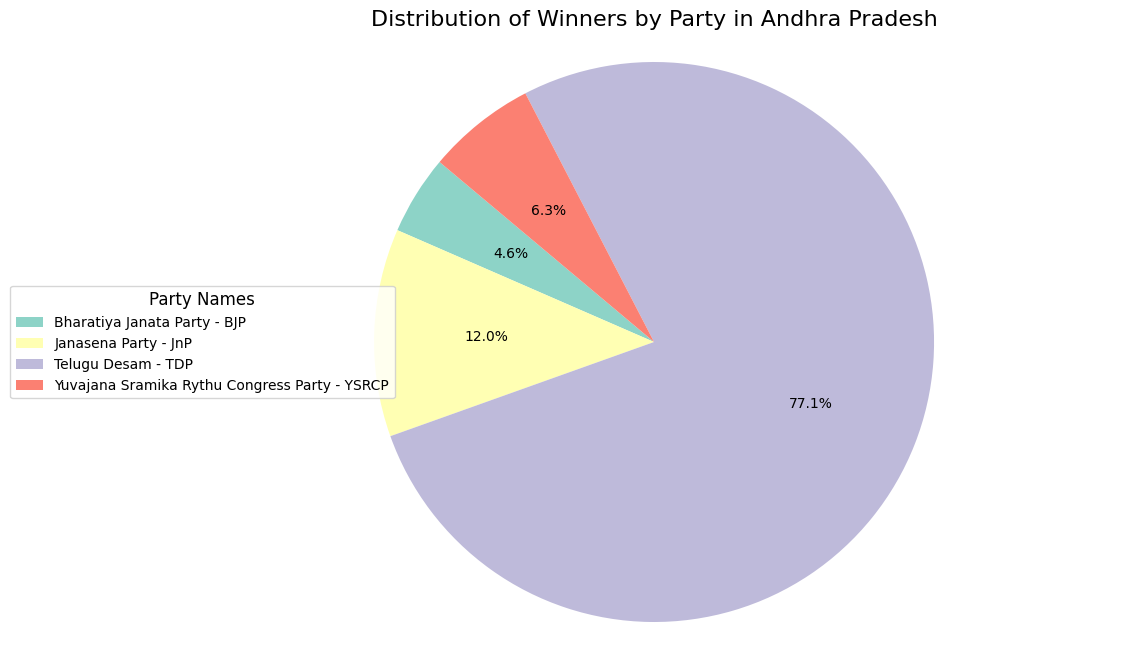

In [37]:
colors = plt.cm.Set3.colors 
fig, ax = plt.subplots(figsize=(12, 8)) 
wedges, texts, autotexts = ax.pie(ap_party_counts, autopct='%1.1f%%',
                                  startangle=140, colors=colors)
ax.axis('equal')

legend = ax.legend(wedges, ap_party_counts.index, title="Party Names", loc="center left", bbox_to_anchor=(-0.2, 0.5))
plt.setp(legend.get_title(), fontsize='large')  

ax.set_title('Distribution of Winners by Party in Andhra Pradesh', fontsize=16)

plt.show()


# <b> Total Seats in Andhra Pradesh and Odisha

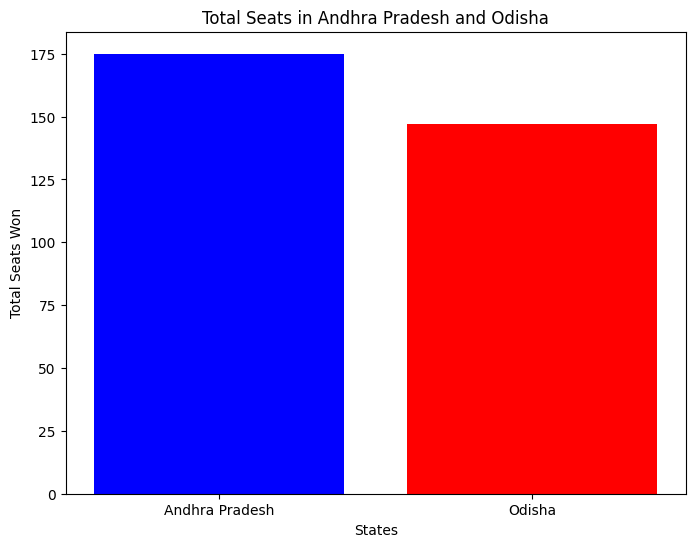

In [82]:
states = ['Andhra Pradesh', 'Odisha']
total_seats = [total_seats_ap, total_seats_od]

plt.figure(figsize=(8, 6))
plt.bar(states, total_seats, color=['blue', 'red'])
plt.xlabel('States')
plt.ylabel('Total Seats Won')
plt.title('Total Seats in Andhra Pradesh and Odisha')

plt.show()
